In this notebook, I:
1. Create crime categories columns.
2. Figure out the age at the time of the first crime (the feature crime).
3. Convert strings to floats of the term lengths.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
pd.set_option('display.max_columns', 100)

In [28]:
df = pd.read_csv('../datasets/my_data/feature_cats.csv')

In [29]:
df.shape

(40828, 33)

In [30]:
df[:5]

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target
0,Victor Cantu,327167,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,MURDER W/DEADLY WPN,3/3/1980,60 years,9/7/1980,No_data,No_data,No_data,No_data,Male,Hispanic,71,60 years,Allred,3/2/1948,Hockley,2044-11-23,2044,MURDER W/DEADLY WPN,9/7/1980,60 years,3/3/1980,HARASSMENT BY PER/CORR FACIL,1
1,Pascual Gutierrez Salinas,394125,POSS DDLY WPM PENAL INSTI,7/19/1997,5 years,2/10/1998,MURDER,8/6/1984,60 years,8/6/1984,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,62,60 years,Allred,4/21/1957,Cameron,2047-08-16,2047,MURDER,8/6/1984,60 years,8/6/1984,POSS DDLY WPM PENAL INSTI,1
2,Larry Dewayne Manuel,843835,MURDER,2/2/1994,55 years,2/3/1994,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,42,55 years,Allred,3/12/1977,Dallas,2049-02-02,2049,MURDER,2/3/1994,55 years,2/2/1994,0,0
3,Wayne Edward Cole,358223,BURG OF HABITATION,11/28/1982,55 years,12/10/1982,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,62,55 years,Allred,10/22/1956,Panola,2037-12-10,2037,BURG OF HABITATION,12/10/1982,55 years,11/28/1982,0,0
4,Alberto Rivas,626012,MURDER W/DEADLY WPN,9/22/1991,55 years,9/22/1991,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,51,55 years,Allred,5/13/1968,Hale,2046-09-22,2046,MURDER W/DEADLY WPN,9/22/1991,55 years,9/22/1991,0,0


**Functions for crime categories**

In [31]:
def theft_crime(cell):
    if 'BURG' in cell:
        return True
    elif 'THEFT' in cell:
        return True
    elif 'ROBB' in cell:
        return True
    elif 'ROB' in cell:
        return True
    elif 'THFT' in cell:
        return True
    elif 'BURLGARY' in cell:
        return True
    else:
        return False

In [32]:
def drugs(cell):
    if 'DRUGS' in cell:
        return True
    elif 'POSS' in cell:
        return True
    elif 'HEROIN' in cell:
        return True
    elif 'METH' in cell:
        return True
    elif 'COCAINE' in cell:
        return True
    elif 'CONT SUB' in cell:
        return True
    elif 'CONTROL SUBSTANCE' in cell:
        return True
    elif 'MARIJUANA' in cell:
        return True
    elif 'DEL' in cell: #ie DEL MARIJ or DEL COC
        return True 
    elif 'PROHIB SUB' in cell:
        return True
    else:
        return False

In [33]:
def assault(cell):
    if 'ASSLT' in cell:
        return True
    elif 'ASSAULT' in cell:
        return True
    elif 'ASLT' in cell:
        return True
    else:
        return False

In [34]:
def aggravated(cell):
    if 'AGG' in cell:
        return True
    else:
        return False

In [35]:
def weapon(cell):
    if 'WPN' in cell:
        return True
    if 'DEADLY' in cell:
        return True
    if 'WEA' in cell:
        return True
    if 'MURD' in cell:
        return True
    else:
        return False

In [36]:
def child(cell):
    if 'CHILD' in cell:
        return True
    elif 'CHLD' in cell:
        return True
    elif 'KIDNAP' in cell:
        return True
    elif 'MINOR' in cell:
        return True
    else:
        return False

In [37]:
def arson(cell):
    if 'ARSON' in cell:
        return True
    else:
        return False

In [38]:
def evading(cell):
    if 'EVAD' in cell:
        return True
    else:
        return False

In [39]:
def escape(cell):
    if 'ESCAPE' in cell:
        return True
    else: 
        return False

In [40]:
def elderly(cell):
    if 'ELD' in cell:
        return True
    else:
        return False

In [41]:
def alcohol(cell):
    if 'DWI' in cell:
        return True
    elif 'INTOX' in cell:
        return True
    else:
        return False

In [42]:
def manslaughter(cell):
    if 'MANSLAUGHTER' in cell:
        return True
    else:
        return False

In [43]:
def org_crime(cell):
    if 'ORG CRIM ACT' in cell:
        return True
    elif 'ORG CRIMINAL ACTIVITY' in cell:
        return True
    elif 'ORG CRM' in cell:
        return True
    elif 'ORGAN CRIM ACT' in cell:
        return True
    elif 'ORG CRIME' in cell:
        return True
    else:
        return False

In [44]:
def credit_debit(cell):
    if 'CREDIT CARD' in cell:
        return True
    elif 'DEBIT CARD' in cell:
        return True
    else: 
        return False

In [45]:
def forgery(cell):
    if 'FORGERY' in cell:
        return True
    elif 'FORGE' in cell:
        return True
    elif 'FORG' in cell:
        return True
    else:
        return False

In [46]:
def motor_vehicle(cell):
    if 'VEH' in cell:
        return True
    elif 'VEHICLE' in cell:
        return True
    elif 'UUMV' in cell:
        return True
    elif 'MOTOR' in cell:
        return True
    elif 'UUV' in cell:
        return True
    else:
        return False

In [47]:
def sex_crime(cell):
    if 'SEX' in cell:
        return True
    elif 'RAPE' in cell:
        return True
    else:
        return False

In [48]:
def tampering(cell):
    if 'TAMP' in cell:
        return True
    else:
        return False

In [49]:
def prison_related(cell):
    if 'CORR' in cell: #for corrections facility
        return True
    if 'BAIL' in cell: #bail jumping
        return True
    else:
        return False 

Taking the functions for the `crime_categories` and applying them to the dataframe.

In [50]:
df['feature_crime'][:20]

0           MURDER W/DEADLY WPN
1                        MURDER
2                        MURDER
3            BURG OF HABITATION
4           MURDER W/DEADLY WPN
5             INDECENCY W/CHILD
6         POSS OF A C/S COCAINE
7              MUR W/DEADLY WPN
8                        MURDER
9                        MURDER
10                       MURDER
11                        THEFT
12       AGG ROBBERY W/DEAD WPN
13                  AGG ROBBERY
14    BRG HAB SEX ASLT DEAD WPN
15    THEFT OF PROP FROM PERSON
16               ATT BURG HABIT
17        AGG SEX ASSAULT CHILD
18                       MURDER
19                        THEFT
Name: feature_crime, dtype: object

In [51]:
#i couldnt apply the functions, had to see if there were non-strings (and there were - got 'mixed')
pd.api.types.infer_dtype(df['feature_crime'])

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  exec(code_obj, self.user_global_ns, self.user_ns)


'mixed'

In [52]:
#making them all strings so i could do the functions 
feature_strings = []
for cell in df['feature_crime']:
    new_cell = str(cell)
    
    feature_strings.append(new_cell)

In [53]:
df.shape[0]

40828

In [54]:
len(feature_strings)

40828

In [55]:
df['feature_crime'] = feature_strings

In [56]:
#double checking that it worked 
pd.api.types.infer_dtype(df['feature_crime'])

'string'

In [57]:
#EVERYTHING IN THE SERIES HAS TO BE A STRING FOR THIS TO RUN
df['prison_related_crime'] = df['feature_crime'].apply(prison_related)
df['tampering_crime'] = df['feature_crime'].apply(tampering)
df['credit_card_crime'] = df['feature_crime'].apply(credit_debit)
df['elderly_crime'] = df['feature_crime'].apply(elderly)
df['escape_crime'] = df['feature_crime'].apply(escape)
df['evading_crime'] = df['feature_crime'].apply(evading)
df['theft_crime'] = df['feature_crime'].apply(theft_crime)
df['sex_crime'] = df['feature_crime'].apply(sex_crime)
df['crime_involving_child'] = df['feature_crime'].apply(child)
df['drugs_crime'] = df['feature_crime'].apply(drugs)
df['assault_crime'] = df['feature_crime'].apply(assault)
df['aggravated_crime'] = df['feature_crime'].apply(aggravated)
df['deadly_weapon_crime'] = df['feature_crime'].apply(weapon)
df['alcohol_crime'] = df['feature_crime'].apply(alcohol)
df['arson_crime'] = df['feature_crime'].apply(arson)
df['manslaughter_crime'] = df['feature_crime'].apply(manslaughter)
df['organized_crime'] = df['feature_crime'].apply(org_crime)
df['forgery_crime'] = df['feature_crime'].apply(forgery)
df['vehicle_crime'] = df['feature_crime'].apply(motor_vehicle)

In [58]:
#need to delete poss and DWI crimes, too specific
#df.drop(columns = ['poss_crime', 'DWI_crime'], inplace=True)

In [59]:
#thinking i could prob just have the functions above return 1 or 0 moving forward
df = df.replace({True: 1, False: 0})

In [60]:
#setting up other crimes if no other category has been populated
df['other_crime'] = df['prison_related_crime'] + df['tampering_crime'] + df['vehicle_crime'] + df['sex_crime'] + df['forgery_crime'] + df['credit_card_crime'] + df['organized_crime']+ df['manslaughter_crime'] + df['elderly_crime'] + df['escape_crime'] + df['evading_crime']+ df['theft_crime'] + df['crime_involving_child'] + df['arson_crime'] + df['drugs_crime'] + df['alcohol_crime'] + df['assault_crime'] + df['aggravated_crime'] + df['deadly_weapon_crime']

In [61]:
#if theres a total number, it means that a diff cat has been committed
def other_crimes(cell):
    if cell != 0:
        return 0
    if cell == 0:
        return 1

In [62]:
df['other_crime'] = df['other_crime'].apply(other_crimes)

A way for me to see what's in `other_crimes` to determine if I need to build out other categories.

In [63]:
#trafficking, smuggling, stalking, retaliation, 

In [64]:
other_mask = df[df['other_crime'] == 1]

other_mask[['name', 'feature_crime', 'other_crime']][:20]

,name,feature_crime,other_crime
99,Stephen Felipe Gamez,RETALIATION,1
158,Dante Terrell Williams,ENGAGE IN ORGAN CRIME,1
221,Roderick Jamail Webber,RETALIATION,1
299,"Fermin Gene Rayos, Jr",DDLY COND,1
313,Donavan A Rankins,CRUELTY TO ANIMALS,1
345,Juan Cantu,ENGAGE IN ORGANIZED CRIMINAL A,1
358,Pedro Sierra,CRIM MISCHIEF O/$750 L/$20000,1
363,Derrick Deshawn Morris,VIOL PROTECTIVE ORDER,1
423,Manuel Anthony Burton,ATT TRAFFICKING OF PERSONS,1
426,Rodrigo Ramon Rodriguez,CRIMINAL MISCHIEF,1


Getting the value counts for each time of crime category.

In [65]:
df.columns

Index(['name', 'TDCJ_ID', 'pr_crime_0', 'pr_commit_date_0', 'pr_term_0',
       'pr_begins_0', 'pr_crime_1', 'pr_commit_date_1', 'pr_term_1',
       'pr_begins_1', 'pr_crime_2', 'pr_commit_date_2', 'pr_term_2',
       'pr_begins_2', 'pr_crime_3', 'pr_commit_date_3', 'pr_term_3',
       'pr_begins_3', 'sex', 'race', 'age', 'max_sentence', 'prison_unit',
       'DOB', 'home_county', 'proj_release_date', 'year_of_release',
       'feature_crime', 'feature_startdate', 'feature_term',
       'feature_commit_date', 'target_value', 'final_target',
       'prison_related_crime', 'tampering_crime', 'credit_card_crime',
       'elderly_crime', 'escape_crime', 'evading_crime', 'theft_crime',
       'sex_crime', 'crime_involving_child', 'drugs_crime', 'assault_crime',
       'aggravated_crime', 'deadly_weapon_crime', 'alcohol_crime',
       'arson_crime', 'manslaughter_crime', 'organized_crime', 'forgery_crime',
       'vehicle_crime', 'other_crime'],
      dtype='object')

In [66]:
crime_list = [column for column in df.columns[33:] if 'crime' in column]

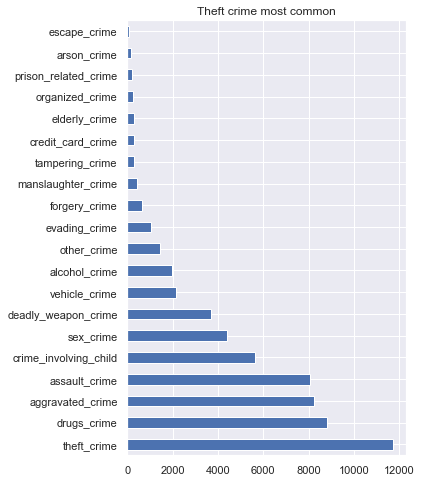

In [67]:
plt.figure(figsize= (5,8))
sns.set(font_scale=1)
df[crime_list].sum().sort_values(ascending=False).\
plot(kind='barh', title= 'Theft crime most common')

Saving to a CSV with the categories complete. All that's left is age at time of feature crime. I think I should take the date of feature crime committed and subtract by DOB (I will have to `pd.datetime` these in the notebook.

In [68]:
#ALL MODELS use this data
df.to_csv('../datasets/my_data/EDA_825_Rnd1.csv', index=False)

Converting what I need to `pd.datetime`.

This `will not save in the .csv, it has to be run each time in the notebook`.

In [69]:
df['pr_commit_date_0'] = pd.to_datetime(df['pr_commit_date_0'])

In [70]:
df['feature_commit_date'] = pd.to_datetime(df['feature_commit_date'])

In [71]:
df['feature_startdate'] = pd.to_datetime(df['feature_startdate'])

In [72]:
df['DOB'] = pd.to_datetime(df['DOB'])

Checking them out and getting `age at time committed feature crime`.

In [73]:
df[['name', 'feature_crime', 'feature_startdate', 'feature_term',
       'feature_commit_date', 'DOB']][:15]

,name,feature_crime,feature_startdate,feature_term,feature_commit_date,DOB
0,Victor Cantu,MURDER W/DEADLY WPN,1980-09-07,60 years,1980-03-03,1948-03-02
1,Pascual Gutierrez Salinas,MURDER,1984-08-06,60 years,1984-08-06,1957-04-21
2,Larry Dewayne Manuel,MURDER,1994-02-03,55 years,1994-02-02,1977-03-12
3,Wayne Edward Cole,BURG OF HABITATION,1982-12-10,55 years,1982-11-28,1956-10-22
4,Alberto Rivas,MURDER W/DEADLY WPN,1991-09-22,55 years,1991-09-22,1968-05-13
5,Damicio A Sanchez,INDECENCY W/CHILD,1994-04-10,55 years,1994-04-10,1939-11-12
6,Brison Keith Humphrey,POSS OF A C/S COCAINE,1991-01-05,51 years,1991-01-05,1964-04-23
7,Terry Edward Flowers,MUR W/DEADLY WPN,1988-07-24,51 years,1988-07-18,1963-03-25
8,Johnny Ray Arthur,MURDER,1988-08-10,50 years,1988-07-25,1959-03-01
9,John Eugenio Quinones,MURDER,1996-08-28,50 years,1996-08-26,1981-04-13


In [74]:
#df_test['Difference'] = df_test['Difference'] / np.timedelta64(1, 'D')
df['age_tester_days'] = df['feature_commit_date'] - df['DOB']

In [75]:
#it is defaulting to 'days', but it's actually giving me the years here
#this is so wildly cool, i'm sure i could change the setting
for cell in df['age_tester_days'][:5]:
    print(cell/365)

32 days 00:35:30.410958
27 days 07:29:45.205479
16 days 21:45:51.780821
26 days 02:49:38.630136
23 days 09:00:29.589041


In [76]:
df['commit_age'] = df['age_tester_days'] / np.timedelta64(1, 'Y')

In [77]:
df[['name', 'feature_crime', 'feature_startdate', 'feature_term',
       'commit_age', 'feature_commit_date', 'DOB']][:15]

,name,feature_crime,feature_startdate,feature_term,commit_age,feature_commit_date,DOB
0,Victor Cantu,MURDER W/DEADLY WPN,1980-09-07,60 years,32.003395,1980-03-03,1948-03-02
1,Pascual Gutierrez Salinas,MURDER,1984-08-06,60 years,27.294195,1984-08-06,1957-04-21
2,Larry Dewayne Manuel,MURDER,1994-02-03,55 years,16.895624,1994-02-02,1977-03-12
3,Wayne Edward Cole,BURG OF HABITATION,1982-12-10,55 years,26.100467,1982-11-28,1956-10-22
4,Alberto Rivas,MURDER W/DEADLY WPN,1991-09-22,55 years,23.359823,1991-09-22,1968-05-13
5,Damicio A Sanchez,INDECENCY W/CHILD,1994-04-10,55 years,54.410426,1994-04-10,1939-11-12
6,Brison Keith Humphrey,POSS OF A C/S COCAINE,1991-01-05,51 years,26.702807,1991-01-05,1964-04-23
7,Terry Edward Flowers,MUR W/DEADLY WPN,1988-07-24,51 years,25.317426,1988-07-18,1963-03-25
8,Johnny Ray Arthur,MURDER,1988-08-10,50 years,29.402383,1988-07-25,1959-03-01
9,John Eugenio Quinones,MURDER,1996-08-28,50 years,15.370610,1996-08-26,1981-04-13


Saving to .csv with `commit_age` and all `crime_cats`.

In [78]:
#this will not be necessary next round since it's deleted up top
#df = df.drop(columns = 'age_committed_feature_crime')

In [79]:
#just to check the columns in full before saving
df[:2]

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age
0,Victor Cantu,327167,HARASSMENT BY PER/CORR FACIL,2003-02-20,9 years,2/20/2003,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,MURDER W/DEADLY WPN,3/3/1980,60 years,9/7/1980,No_data,No_data,No_data,No_data,Male,Hispanic,71,60 years,Allred,1948-03-02,Hockley,2044-11-23,2044,MURDER W/DEADLY WPN,1980-09-07,60 years,1980-03-03,HARASSMENT BY PER/CORR FACIL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11689 days,32.003395
1,Pascual Gutierrez Salinas,394125,POSS DDLY WPM PENAL INSTI,1997-07-19,5 years,2/10/1998,MURDER,8/6/1984,60 years,8/6/1984,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,62,60 years,Allred,1957-04-21,Cameron,2047-08-16,2047,MURDER,1984-08-06,60 years,1984-08-06,POSS DDLY WPM PENAL INSTI,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9969 days,27.294195


In [80]:
#models where AGE == float use this model
df.to_csv('../datasets/my_data/EDA_825_Rnd2.csv', index=False)

### Creating float variables for the term length of the crime to potentially add as a feature

In [81]:
df.isnull().sum()

name                       0
TDCJ_ID                    0
pr_crime_0                 0
pr_commit_date_0           0
pr_term_0                  0
pr_begins_0                0
pr_crime_1                 3
pr_commit_date_1           0
pr_term_1                402
pr_begins_1                0
pr_crime_2                 5
pr_commit_date_2           0
pr_term_2                405
pr_begins_2                0
pr_crime_3                 1
pr_commit_date_3           0
pr_term_3                374
pr_begins_3                0
sex                        0
race                       0
age                        0
max_sentence               0
prison_unit                0
DOB                        0
home_county                0
proj_release_date          0
year_of_release            0
feature_crime              0
feature_startdate          0
feature_term             611
feature_commit_date        0
target_value               2
final_target               0
prison_related_crime       0
tampering_crim

In [82]:
df.shape

(40828, 55)

In [83]:
611/40_828

0.014965219947095132

In [84]:
df = df.dropna(subset=['feature_term'])

In [85]:
df.shape

(40217, 55)

In [86]:
df['feature_term'].unique()

array(['60 years', '55 years', '51 years', '50 years', '10 years',
       '15 years', '8 years', '20 years', '4 years', '5 years', '2 years',
       '30 years', '47 years', '45 years', '6 months', '3 years',
       '42 years', '40 years', '10 months', '1 year', '1 year, 3 months',
       '11 years', '6 years', '38 years', '37 years', '7 years',
       '36 years', '25 years', '35 years', '28 years', '9 months',
       '1 year, 2 months', '12 years', '34 years', '33 years', '32 years',
       '16 years', '5 years, 6 months', '1 year, 1 month',
       '1 year, 6 months', '1 year, 5 months', '27 years',
       '1 year, 8 months', '8 months', '18 years', '14 years', '7 months',
       '24 years', '23 years', '22 years', '19 years', '17 years',
       '9 years', '1 year, 10 months', '1 year, 4 months', '13 years',
       '12 years, 6 months', '1 year, 11 months, 26 days',
       '2 years, 6 months', '1 year, 4 months, 15 days',
       '1 year, 9 months', '5 years, 11 months, 29 days', '48 ye

In [87]:
#getting rid of the weird terms that appear to be input incorrectly
df = df[df['feature_term'] != '2012 years, 8 months, 16 days']

In [88]:
df = df[df['feature_term'] != '2011 years, 10 months, 15 days']

In [89]:
df = df[df['feature_term'] != 'Life']

In [90]:
#just in case, i think they are all already strings
df['feature_term'] = df['feature_term'].astype(str)

In [91]:
split_list = []
for term in df['feature_term']:
    split_term = term.split(', ')
    
    split_list.append(split_term)

In [92]:
len(split_list)

40214

In [93]:
[type(cell) for cell in split_list[2]]

[str]

In [94]:
for term in split_list:
    if len(term) ==3:
        term[0] = float(term[0].replace(' years', '.').replace(' year', '.')) 
        term[1] = float(term[1].replace(' months', '').replace(' month', '')) /12
        term[2] = float(term[2].replace(' days', '').replace(' day', '')) / 365
    
    if len(term) == 2:
        if 'month' in term[0]:
            term[0] = float(term[0].replace(' months', ''))/12
            term[1] = float(term[1].replace(' days', '').replace(' day', '')) / 365
        elif 'year' in term[0] and 'month' in term[1]:
            term[0] = float(term[0].replace(' years', '.').replace(' year', '.'))
            term[1] = float(term[1].replace(' months', '').replace(' month', '')) / 12
        elif 'year' in term[0] and 'day' in term[1]:
            term[0] = float(term[0].replace(' years', '').replace(' year', ''))
            term[1] = float(term[1].replace(' days', '').replace(' day', '')) / 365
    
    
    if len(term) == 1:
        if 'year' in term[0]:
            term[0] = float(term[0].replace(' years', '').replace(' year', ''))
        
        elif 'month' in term[0]:
            term[0] = float(term[0].replace(' months', '').replace(' month', '')) / 12
            
        elif 'day' in term[0]:
            term[0] = float(term[0].replace(' days', '').replace(' day', '')) / 365
        
    

        
        
     
        print(term)

[60.0]
[60.0]
[55.0]
[55.0]
[55.0]
[55.0]
[51.0]
[51.0]
[50.0]
[50.0]
[50.0]
[10.0]
[50.0]
[50.0]
[15.0]
[10.0]
[50.0]
[50.0]
[50.0]
[8.0]
[50.0]
[20.0]
[50.0]
[50.0]
[10.0]
[10.0]
[4.0]
[50.0]
[50.0]
[5.0]
[2.0]
[50.0]
[30.0]
[50.0]
[10.0]
[47.0]
[30.0]
[45.0]
[45.0]
[45.0]
[20.0]
[45.0]
[45.0]
[0.5]
[45.0]
[5.0]
[20.0]
[45.0]
[45.0]
[2.0]
[10.0]
[20.0]
[45.0]
[20.0]
[45.0]
[3.0]
[2.0]
[30.0]
[42.0]
[10.0]
[40.0]
[3.0]
[5.0]
[2.0]
[2.0]
[0.8333333333333334]
[3.0]
[5.0]
[40.0]
[20.0]
[10.0]
[40.0]
[1.0]
[40.0]
[10.0]
[40.0]
[20.0]
[40.0]
[40.0]
[40.0]
[5.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[11.0]
[40.0]
[40.0]
[4.0]
[40.0]
[4.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[5.0]
[6.0]
[10.0]
[5.0]
[40.0]
[2.0]
[5.0]
[40.0]
[4.0]
[20.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[10.0]
[20.0]
[40.0]
[40.0]
[2.0]
[15.0]
[38.0]
[38.0]
[6.0]
[10.0]
[5.0]
[37.0]
[7.0]
[15.0]
[36.0]
[10.0]
[25.0]
[35.0]
[10.0]
[10.0]
[35.0]
[15.0]
[35.0]
[15.0]
[30.0]
[6.0]
[35.0]
[35.0]
[35.0]
[35.0]
[4.0]
[35.0]
[3

[30.0]
[20.0]
[5.0]
[30.0]
[30.0]
[28.0]
[28.0]
[3.0]
[28.0]
[28.0]
[12.0]
[28.0]
[6.0]
[27.0]
[26.0]
[26.0]
[3.0]
[0.5]
[7.0]
[11.0]
[20.0]
[1.0]
[25.0]
[15.0]
[25.0]
[10.0]
[25.0]
[20.0]
[10.0]
[2.0]
[2.0]
[25.0]
[0.75]
[20.0]
[2.0]
[18.0]
[20.0]
[25.0]
[25.0]
[7.0]
[3.0]
[25.0]
[25.0]
[7.0]
[5.0]
[2.0]
[25.0]
[25.0]
[8.0]
[4.0]
[25.0]
[10.0]
[25.0]
[10.0]
[2.0]
[3.0]
[25.0]
[3.0]
[25.0]
[12.0]
[25.0]
[10.0]
[5.0]
[25.0]
[1.0]
[25.0]
[25.0]
[25.0]
[3.0]
[1.0]
[6.0]
[10.0]
[25.0]
[25.0]
[25.0]
[20.0]
[5.0]
[25.0]
[6.0]
[3.0]
[5.0]
[24.0]
[24.0]
[15.0]
[24.0]
[2.0]
[23.0]
[22.0]
[20.0]
[22.0]
[10.0]
[1.0]
[22.0]
[20.0]
[20.0]
[10.0]
[8.0]
[3.0]
[20.0]
[10.0]
[20.0]
[1.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[8.0]
[20.0]
[10.0]
[0.5833333333333334]
[3.0]
[6.0]
[7.0]
[20.0]
[7.0]
[20.0]
[25.0]
[6.0]
[20.0]
[2.0]
[0.9166666666666666]
[20.0]
[20.0]
[10.0]
[20.0]
[3.0]
[20.0]
[2.0]
[5.0]
[20.0]
[7.0]
[20.0]
[10.0]
[3.0]
[2.0]
[20.0]
[20.0]
[10.0]
[20.0]
[20.0]
[20.0]
[0.5]
[10.0]
[20.0

[5.0]
[5.0]
[5.0]
[5.0]
[0.5]
[5.0]
[5.0]
[2.0]
[5.0]
[5.0]
[4.0]
[4.0]
[5.0]
[0.5]
[5.0]
[5.0]
[0.6666666666666666]
[0.75]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[0.5]
[5.0]
[0.9166666666666666]
[2.0]
[5.0]
[5.0]
[1.0]
[5.0]
[5.0]
[6.0]
[1.0]
[5.0]
[0.6666666666666666]
[5.0]
[5.0]
[5.0]
[0.8333333333333334]
[0.5]
[5.0]
[2.0]
[1.0]
[4.0]
[4.0]
[4.0]
[4.0]
[4.0]
[1.0]
[4.0]
[0.5]
[4.0]
[2.0]
[4.0]
[4.0]
[4.0]
[0.5]
[4.0]
[4.0]
[2.0]
[4.0]
[4.0]
[4.0]
[4.0]
[3.0]
[4.0]
[4.0]
[4.0]
[3.0]
[4.0]
[4.0]
[0.5]
[4.0]
[4.0]
[1.0]
[4.0]
[4.0]
[4.0]
[4.0]
[4.0]
[4.0]
[4.0]
[4.0]
[4.0]
[2.0]
[4.0]
[0.75]
[4.0]
[4.0]
[3.0]
[4.0]
[4.0]
[4.0]
[4.0]
[2.0]
[4.0]
[8.0]
[4.0]
[4.0]
[4.0]
[4.0]
[0.6666666666666666]
[1.0]
[0.5]
[4.0]
[0.6666666666666666]
[4.0]
[3.0]
[3.0]
[3.0]
[3.0]
[0.5]
[3.0]
[1.0]
[0.5]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[1.0]
[3.0]
[3.0]
[3.0]
[2.0]
[0.5]
[0.5]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[2.0]
[3.0]
[3.0]
[0.5]
[4

[17.0]
[15.0]
[4.0]
[15.0]
[3.0]
[10.0]
[8.0]
[2.0]
[15.0]
[15.0]
[15.0]
[15.0]
[15.0]
[15.0]
[0.75]
[15.0]
[6.0]
[6.0]
[2.0]
[15.0]
[2.0]
[2.0]
[2.0]
[12.0]
[4.0]
[15.0]
[2.0]
[15.0]
[6.0]
[15.0]
[12.0]
[15.0]
[14.0]
[2.0]
[13.0]
[9.0]
[5.0]
[13.0]
[12.0]
[12.0]
[1.0]
[3.0]
[5.0]
[11.0]
[1.0]
[12.0]
[12.0]
[4.0]
[12.0]
[2.0]
[12.0]
[10.0]
[4.0]
[9.0]
[12.0]
[3.0]
[5.0]
[0.6666666666666666]
[12.0]
[12.0]
[5.0]
[12.0]
[10.0]
[12.0]
[2.0]
[10.0]
[10.0]
[2.0]
[10.0]
[7.0]
[10.0]
[10.0]
[10.0]
[10.0]
[15.0]
[2.0]
[2.0]
[1.0]
[10.0]
[10.0]
[0.5]
[10.0]
[0.5]
[6.0]
[1.0]
[6.0]
[10.0]
[10.0]
[2.0]
[5.0]
[10.0]
[10.0]
[1.0]
[6.0]
[10.0]
[9.0]
[9.0]
[4.0]
[5.0]
[5.0]
[8.0]
[8.0]
[4.0]
[1.0]
[8.0]
[6.0]
[8.0]
[8.0]
[8.0]
[6.0]
[8.0]
[8.0]
[1.0]
[8.0]
[8.0]
[8.0]
[8.0]
[2.0]
[4.0]
[20.0]
[8.0]
[8.0]
[8.0]
[6.0]
[0.5833333333333334]
[8.0]
[2.0]
[5.0]
[0.5833333333333334]
[8.0]
[7.0]
[3.0]
[7.0]
[7.0]
[7.0]
[0.5]
[0.75]
[0.5]
[2.0]
[7.0]
[7.0]
[3.0]
[0.5]
[7.0]
[5.0]
[7.0]
[7.0]
[5.0]
[2.0]
[7.0]
[

[25.0]
[15.0]
[5.0]
[25.0]
[25.0]
[25.0]
[4.0]
[25.0]
[5.0]
[25.0]
[25.0]
[25.0]
[25.0]
[25.0]
[20.0]
[5.0]
[25.0]
[2.0]
[25.0]
[25.0]
[25.0]
[5.0]
[7.0]
[2.0]
[5.0]
[25.0]
[3.0]
[6.0]
[3.0]
[15.0]
[2.0]
[15.0]
[5.0]
[20.0]
[25.0]
[25.0]
[25.0]
[2.0]
[25.0]
[2.0]
[25.0]
[2.0]
[20.0]
[8.0]
[2.0]
[25.0]
[24.0]
[2.0]
[24.0]
[24.0]
[24.0]
[23.0]
[23.0]
[23.0]
[5.0]
[10.0]
[20.0]
[6.0]
[22.0]
[0.5]
[22.0]
[10.0]
[4.0]
[21.0]
[5.0]
[8.0]
[10.0]
[20.0]
[2.0]
[20.0]
[20.0]
[20.0]
[2.0]
[20.0]
[20.0]
[20.0]
[20.0]
[10.0]
[20.0]
[10.0]
[10.0]
[6.0]
[20.0]
[15.0]
[20.0]
[4.0]
[5.0]
[0.5]
[2.0]
[20.0]
[20.0]
[20.0]
[1.0]
[20.0]
[20.0]
[2.0]
[20.0]
[20.0]
[4.0]
[2.0]
[15.0]
[10.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[3.0]
[20.0]
[2.0]
[5.0]
[20.0]
[1.0]
[5.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[20.0]
[10.0]
[15.0]
[20.0]
[20.0]
[3.0]
[15.0]
[2.0]
[16.0]
[10.0]
[10.0]
[3.0]
[20.0]
[8.0]
[20.0]
[15.0]
[10.0]
[20.0]
[5.0]
[20.0]
[20.0]
[15.0]
[20.0]
[3.0]
[10.0]
[20.0]
[20.0]
[5.0]
[20.0]

[9.0]
[0.6666666666666666]
[1.0]
[0.75]
[9.0]
[9.0]
[0.5]
[4.0]
[8.0]
[6.0]
[8.0]
[8.0]
[8.0]
[10.0]
[8.0]
[5.0]
[8.0]
[8.0]
[2.0]
[8.0]
[8.0]
[8.0]
[3.0]
[0.75]
[8.0]
[0.5]
[3.0]
[8.0]
[8.0]
[0.9166666666666666]
[8.0]
[10.0]
[6.0]
[8.0]
[8.0]
[1.0]
[8.0]
[10.0]
[8.0]
[8.0]
[2.0]
[8.0]
[8.0]
[8.0]
[2.0]
[6.0]
[8.0]
[5.0]
[10.0]
[8.0]
[0.5]
[8.0]
[4.0]
[1.0]
[5.0]
[8.0]
[8.0]
[8.0]
[8.0]
[7.0]
[7.0]
[7.0]
[7.0]
[7.0]
[7.0]
[7.0]
[5.0]
[6.0]
[7.0]
[7.0]
[7.0]
[5.0]
[3.0]
[7.0]
[10.0]
[7.0]
[7.0]
[4.0]
[7.0]
[5.0]
[2.0]
[6.0]
[7.0]
[7.0]
[0.75]
[7.0]
[6.0]
[7.0]
[4.0]
[10.0]
[2.0]
[2.0]
[3.0]
[6.0]
[6.0]
[6.0]
[6.0]
[0.6666666666666666]
[5.0]
[10.0]
[6.0]
[1.0]
[4.0]
[2.0]
[4.0]
[2.0]
[6.0]
[4.0]
[6.0]
[6.0]
[2.0]
[1.0]
[1.0]
[15.0]
[4.0]
[6.0]
[15.0]
[0.5]
[6.0]
[6.0]
[6.0]
[6.0]
[6.0]
[5.0]
[3.0]
[6.0]
[6.0]
[5.0]
[5.0]
[1.0]
[1.0]
[3.0]
[2.0]
[0.75]
[10.0]
[2.0]
[5.0]
[5.0]
[5.0]
[4.0]
[5.0]
[5.0]
[5.0]
[5.0]
[2.0]
[5.0]
[0.75]
[5.0]
[10.0]
[5.0]
[2.0]
[8.0]
[5.0]
[5.0]
[5.0]
[0.583333

[7.0]
[7.0]
[7.0]
[7.0]
[4.0]
[2.0]
[3.0]
[0.5]
[5.0]
[2.0]
[7.0]
[7.0]
[2.0]
[7.0]
[5.0]
[7.0]
[7.0]
[7.0]
[7.0]
[2.0]
[0.6666666666666666]
[2.0]
[6.0]
[0.5]
[6.0]
[6.0]
[6.0]
[3.0]
[3.0]
[6.0]
[2.0]
[2.0]
[3.0]
[6.0]
[5.0]
[6.0]
[6.0]
[6.0]
[0.75]
[6.0]
[6.0]
[4.0]
[2.0]
[6.0]
[6.0]
[6.0]
[1.0]
[6.0]
[6.0]
[5.0]
[6.0]
[3.0]
[6.0]
[6.0]
[6.0]
[4.0]
[6.0]
[6.0]
[6.0]
[8.0]
[6.0]
[7.0]
[6.0]
[0.8333333333333334]
[3.0]
[5.0]
[6.0]
[5.0]
[6.0]
[6.0]
[0.8333333333333334]
[5.0]
[0.5]
[2.0]
[6.0]
[3.0]
[5.0]
[6.0]
[5.0]
[6.0]
[6.0]
[1.0]
[6.0]
[0.5]
[7.0]
[3.0]
[5.0]
[10.0]
[1.0]
[7.0]
[3.0]
[2.0]
[6.0]
[2.0]
[6.0]
[10.0]
[6.0]
[0.6666666666666666]
[6.0]
[6.0]
[6.0]
[5.0]
[5.0]
[5.0]
[2.0]
[5.0]
[2.0]
[4.0]
[5.0]
[2.0]
[5.0]
[0.5]
[5.0]
[5.0]
[5.0]
[5.0]
[0.6666666666666666]
[2.0]
[5.0]
[5.0]
[5.0]
[5.0]
[1.0]
[10.0]
[2.0]
[0.5]
[0.5]
[5.0]
[0.5]
[2.0]
[5.0]
[3.0]
[5.0]
[20.0]
[4.0]
[5.0]
[1.0]
[7.0]
[1.0]
[5.0]
[0.5]
[0.75]
[5.0]
[0.5]
[0.5]
[5.0]
[1.0]
[2.0]
[4.0]
[2.0]
[5.0]
[5.0]
[7.0]
[

[0.6666666666666666]
[1.0]
[27.0]
[27.0]
[25.0]
[10.0]
[15.0]
[25.0]
[3.0]
[2.0]
[25.0]
[4.0]
[25.0]
[12.0]
[25.0]
[5.0]
[5.0]
[10.0]
[2.0]
[5.0]
[5.0]
[0.6666666666666666]
[8.0]
[15.0]
[2.0]
[2.0]
[1.0]
[6.0]
[25.0]
[25.0]
[17.0]
[1.0]
[7.0]
[4.0]
[9.0]
[25.0]
[1.0]
[10.0]
[17.0]
[20.0]
[1.0]
[2.0]
[5.0]
[3.0]
[5.0]
[6.0]
[25.0]
[15.0]
[10.0]
[0.5]
[8.0]
[7.0]
[10.0]
[20.0]
[4.0]
[10.0]
[3.0]
[4.0]
[20.0]
[25.0]
[5.0]
[10.0]
[25.0]
[3.0]
[2.0]
[0.5]
[25.0]
[25.0]
[8.0]
[8.0]
[25.0]
[1.0]
[6.0]
[25.0]
[30.0]
[6.0]
[20.0]
[3.0]
[25.0]
[3.0]
[6.0]
[6.0]
[25.0]
[3.0]
[3.0]
[6.0]
[15.0]
[2.0]
[1.0]
[15.0]
[3.0]
[14.0]
[0.5833333333333334]
[4.0]
[0.75]
[4.0]
[5.0]
[25.0]
[0.5]
[25.0]
[2.0]
[25.0]
[15.0]
[15.0]
[3.0]
[10.0]
[2.0]
[3.0]
[1.0]
[20.0]
[4.0]
[8.0]
[5.0]
[25.0]
[25.0]
[9.0]
[25.0]
[3.0]
[25.0]
[3.0]
[23.0]
[20.0]
[22.0]
[5.0]
[22.0]
[3.0]
[2.0]
[3.0]
[2.0]
[21.0]
[8.0]
[1.0]
[15.0]
[2.0]
[20.0]
[20.0]
[2.0]
[20.0]
[7.0]
[5.0]
[2.0]
[2.0]
[10.0]
[5.0]
[7.0]
[18.0]
[20.0]
[2.0]
[0.

[1.0]
[3.0]
[3.0]
[3.0]
[3.0]
[0.5]
[3.0]
[3.0]
[4.0]
[2.0]
[10.0]
[1.0]
[3.0]
[2.0]
[3.0]
[6.0]
[10.0]
[2.0]
[2.0]
[0.5]
[0.5]
[2.0]
[0.5]
[2.0]
[2.0]
[1.0]
[2.0]
[3.0]
[0.5]
[3.0]
[2.0]
[2.0]
[2.0]
[8.0]
[0.5]
[2.0]
[2.0]
[0.5]
[2.0]
[0.75]
[7.0]
[0.6666666666666666]
[3.0]
[2.0]
[25.0]
[50.0]
[20.0]
[50.0]
[50.0]
[50.0]
[50.0]
[50.0]
[50.0]
[20.0]
[7.0]
[45.0]
[45.0]
[45.0]
[45.0]
[45.0]
[45.0]
[45.0]
[45.0]
[25.0]
[40.0]
[10.0]
[20.0]
[4.0]
[40.0]
[2.0]
[4.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[40.0]
[15.0]
[40.0]
[40.0]
[20.0]
[40.0]
[37.0]
[36.0]
[11.0]
[35.0]
[10.0]
[3.0]
[35.0]
[35.0]
[35.0]
[3.0]
[35.0]
[35.0]
[35.0]
[35.0]
[35.0]
[20.0]
[35.0]
[10.0]
[0.75]
[2.0]
[35.0]
[35.0]
[35.0]
[35.0]
[35.0]
[2.0]
[3.0]
[34.0]
[2.0]
[32.0]
[1.0]
[5.0]
[1.0]
[0.6666666666666666]
[1.0]
[30.0]
[30.0]
[30.0]
[5.0]
[30.0]
[4.0]
[10.0]
[30.0]
[30.0]
[30.0]
[30.0]
[30.0]
[30.0]
[30.0]
[0.6666666666666666]
[0.5833333333333334]
[1.0]
[15.0]
[30.0]
[2.0]
[20.0]
[2.0]
[30.0]
[6.0]
[20.0]
[10

[10.0]
[3.0]
[8.0]
[2.0]
[5.0]
[5.0]
[10.0]
[10.0]
[10.0]
[10.0]
[0.5]
[10.0]
[2.0]
[10.0]
[2.0]
[10.0]
[10.0]
[5.0]
[10.0]
[10.0]
[5.0]
[10.0]
[3.0]
[3.0]
[6.0]
[1.0]
[2.0]
[10.0]
[10.0]
[1.0]
[2.0]
[0.5]
[3.0]
[0.6666666666666666]
[10.0]
[4.0]
[2.0]
[10.0]
[6.0]
[10.0]
[10.0]
[10.0]
[4.0]
[10.0]
[10.0]
[10.0]
[10.0]
[6.0]
[10.0]
[2.0]
[10.0]
[10.0]
[10.0]
[2.0]
[10.0]
[0.8333333333333334]
[10.0]
[2.0]
[10.0]
[10.0]
[10.0]
[2.0]
[10.0]
[10.0]
[6.0]
[2.0]
[2.0]
[3.0]
[10.0]
[6.0]
[0.6666666666666666]
[5.0]
[1.0]
[10.0]
[10.0]
[10.0]
[10.0]
[10.0]
[2.0]
[10.0]
[10.0]
[10.0]
[2.0]
[10.0]
[10.0]
[10.0]
[10.0]
[0.6666666666666666]
[10.0]
[6.0]
[8.0]
[2.0]
[10.0]
[1.0]
[20.0]
[10.0]
[5.0]
[10.0]
[10.0]
[2.0]
[10.0]
[10.0]
[9.0]
[9.0]
[9.0]
[2.0]
[2.0]
[0.9166666666666666]
[5.0]
[2.0]
[9.0]
[9.0]
[3.0]
[9.0]
[5.0]
[0.8333333333333334]
[6.0]
[9.0]
[9.0]
[9.0]
[8.0]
[5.0]
[0.5]
[8.0]
[2.0]
[8.0]
[8.0]
[2.0]
[8.0]
[10.0]
[2.0]
[8.0]
[0.75]
[8.0]
[8.0]
[4.0]
[0.8333333333333334]
[2.0]
[5.0]
[5.0

[5.0]
[2.0]
[2.0]
[10.0]
[2.0]
[0.75]
[2.0]
[2.0]
[2.0]
[0.75]
[2.0]
[5.0]
[2.0]
[0.5]
[3.0]
[2.0]
[3.0]
[2.0]
[2.0]
[25.0]
[0.6666666666666666]
[0.75]
[3.0]
[2.0]
[2.0]
[2.0]
[2.0]
[7.0]
[2.0]
[5.0]
[2.0]
[2.0]
[8.0]
[2.0]
[4.0]
[2.0]
[2.0]
[2.0]
[1.0]
[2.0]
[2.0]
[2.0]
[2.0]
[0.5]
[2.0]
[15.0]
[20.0]
[6.0]
[2.0]
[2.0]
[2.0]
[5.0]
[6.0]
[7.0]
[10.0]
[3.0]
[3.0]
[0.8333333333333334]
[5.0]
[0.6666666666666666]
[10.0]
[2.0]
[8.0]
[4.0]
[5.0]
[2.0]
[2.0]
[1.0]
[4.0]
[0.5]
[0.6666666666666666]
[1.0]
[0.75]
[4.0]
[2.0]
[3.0]
[1.0]
[4.0]
[20.0]
[2.0]
[0.75]
[4.0]
[5.0]
[0.6666666666666666]
[1.0]
[2.0]
[3.0]
[3.0]
[0.6666666666666666]
[0.6666666666666666]
[5.0]
[1.0]
[2.0]
[4.0]
[10.0]
[1.0]
[9.0]
[3.0]
[0.5]
[1.0]
[0.9166666666666666]
[3.0]
[5.0]
[0.75]
[0.5]
[2.0]
[0.75]
[1.0]
[3.0]
[2.0]
[1.0]
[0.5]
[5.0]
[2.0]
[2.0]
[3.0]
[1.0]
[1.0]
[1.0]
[0.8333333333333334]
[1.0]
[1.0]
[0.5]
[2.0]
[1.0]
[1.0]
[1.0]
[2.0]
[1.0]
[1.0]
[0.8333333333333334]
[0.9166666666666666]
[0.8333333333333334]
[0.8333

[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[3.0]
[7.0]
[3.0]
[0.75]
[2.0]
[7.0]
[3.0]
[3.0]
[3.0]
[3.0]
[4.0]
[2.0]
[2.0]
[2.0]
[2.0]
[5.0]
[2.0]
[0.5833333333333334]
[2.0]
[0.75]
[0.6666666666666666]
[2.0]
[2.0]
[2.0]
[2.0]
[0.6666666666666666]
[2.0]
[3.0]
[0.5]
[5.0]
[0.5]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[5.0]
[2.0]
[2.0]
[2.0]
[4.0]
[2.0]
[1.0]
[16.0]
[2.0]
[0.5]
[2.0]
[4.0]
[0.6666666666666666]
[2.0]
[3.0]
[2.0]
[2.0]
[2.0]
[2.0]
[0.5833333333333334]
[0.5]
[2.0]
[2.0]
[3.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[10.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[5.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0]
[50.0]
[45.0]
[45.0]
[40.0]
[4.0]
[25.0]
[8.0]
[32.0]
[20.0]
[30.0]
[8.0]
[0.5]
[10.0]
[30.0]
[30.0]
[30.0]
[0.5]
[5.0]
[4.0]
[3.0]
[25.0]
[3.0]
[15.0]
[0.6666666666666666]
[5.0]
[12.0]
[25.0]
[5.0]
[0.8333333333333334]
[20.0]
[2.0]
[25.0]
[4.0]
[25.0]
[5.0]
[23.0]
[2.0]
[1.0]
[15.0]
[2.0]
[2.0]
[3.0]
[2.0]
[2.0]
[7.0]
[5.0]
[2.0]
[15.0]

[2.0]
[10.0]
[10.0]
[0.5]
[10.0]
[10.0]
[10.0]
[10.0]
[10.0]
[10.0]
[3.0]
[1.0]
[7.0]
[4.0]
[10.0]
[10.0]
[4.0]
[2.0]
[10.0]
[10.0]
[10.0]
[0.5]
[10.0]
[10.0]
[8.0]
[6.0]
[5.0]
[10.0]
[5.0]
[5.0]
[9.0]
[9.0]
[4.0]
[9.0]
[10.0]
[2.0]
[5.0]
[8.0]
[3.0]
[8.0]
[8.0]
[8.0]
[5.0]
[8.0]
[0.5]
[8.0]
[1.0]
[8.0]
[8.0]
[8.0]
[2.0]
[2.0]
[2.0]
[0.5]
[8.0]
[8.0]
[8.0]
[8.0]
[0.5833333333333334]
[8.0]
[5.0]
[0.6666666666666666]
[20.0]
[8.0]
[8.0]
[8.0]
[8.0]
[7.0]
[10.0]
[4.0]
[5.0]
[4.0]
[8.0]
[3.0]
[8.0]
[3.0]
[0.5]
[8.0]
[7.0]
[2.0]
[7.0]
[4.0]
[7.0]
[7.0]
[5.0]
[7.0]
[7.0]
[0.5833333333333334]
[7.0]
[7.0]
[7.0]
[7.0]
[1.0]
[7.0]
[7.0]
[4.0]
[10.0]
[0.5833333333333334]
[10.0]
[5.0]
[5.0]
[5.0]
[6.0]
[12.0]
[2.0]
[7.0]
[7.0]
[7.0]
[7.0]
[7.0]
[0.75]
[6.0]
[6.0]
[6.0]
[2.0]
[6.0]
[2.0]
[4.0]
[2.0]
[8.0]
[6.0]
[3.0]
[5.0]
[6.0]
[6.0]
[10.0]
[4.0]
[6.0]
[6.0]
[6.0]
[5.0]
[0.5]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[0.5]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[4.0]
[5.0]
[0.8333333333333334]
[0.6666666666

In [95]:
[type(cell) for cell in split_list[2]]

[float]

In [96]:
for term in split_list:
    if len(term) ==3:
        term[0] = term[0] + term[1] + term[2]
        term[1] = term[1]
        term[2] = term[2]
    if len(term) == 2:
        term[0] = term[0] + term[1]
        term[1] = term[1]

In [97]:
new_list = []
for term in split_list:
    for_list = term[0]
    
    new_list.append(for_list)

In [98]:
new_list

[60.0,
 60.0,
 55.0,
 55.0,
 55.0,
 55.0,
 51.0,
 51.0,
 50.0,
 50.0,
 50.0,
 10.0,
 50.0,
 50.0,
 15.0,
 10.0,
 50.0,
 50.0,
 50.0,
 8.0,
 50.0,
 20.0,
 50.0,
 50.0,
 10.0,
 10.0,
 4.0,
 50.0,
 50.0,
 5.0,
 2.0,
 50.0,
 30.0,
 50.0,
 10.0,
 47.0,
 30.0,
 45.0,
 45.0,
 45.0,
 20.0,
 45.0,
 45.0,
 0.5,
 45.0,
 5.0,
 20.0,
 45.0,
 45.0,
 2.0,
 10.0,
 20.0,
 45.0,
 20.0,
 45.0,
 3.0,
 2.0,
 30.0,
 42.0,
 10.0,
 40.0,
 3.0,
 5.0,
 2.0,
 2.0,
 0.8333333333333334,
 3.0,
 5.0,
 40.0,
 20.0,
 10.0,
 40.0,
 1.0,
 40.0,
 10.0,
 40.0,
 20.0,
 40.0,
 40.0,
 40.0,
 5.0,
 40.0,
 40.0,
 40.0,
 40.0,
 1.25,
 40.0,
 11.0,
 40.0,
 40.0,
 4.0,
 40.0,
 4.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 5.0,
 6.0,
 10.0,
 5.0,
 40.0,
 2.0,
 5.0,
 40.0,
 4.0,
 20.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 10.0,
 20.0,
 40.0,
 40.0,
 2.0,
 15.0,
 38.0,
 38.0,
 6.0,
 10.0,
 5.0,
 37.0,
 7.0,
 15.0,
 36.0,
 10.0,
 25.0,
 35.0,
 10.0,
 10.0,
 35.0,
 15.0,
 35.0,
 15.0,
 30.0,
 6.0,
 35.0,
 35.0,
 35.0,
 35.0,
 4.0,
 3

In [99]:
df.head()

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age
0,Victor Cantu,327167,HARASSMENT BY PER/CORR FACIL,2003-02-20,9 years,2/20/2003,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,MURDER W/DEADLY WPN,3/3/1980,60 years,9/7/1980,No_data,No_data,No_data,No_data,Male,Hispanic,71,60 years,Allred,1948-03-02,Hockley,2044-11-23,2044,MURDER W/DEADLY WPN,1980-09-07,60 years,1980-03-03,HARASSMENT BY PER/CORR FACIL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11689 days,32.003395
1,Pascual Gutierrez Salinas,394125,POSS DDLY WPM PENAL INSTI,1997-07-19,5 years,2/10/1998,MURDER,8/6/1984,60 years,8/6/1984,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,62,60 years,Allred,1957-04-21,Cameron,2047-08-16,2047,MURDER,1984-08-06,60 years,1984-08-06,POSS DDLY WPM PENAL INSTI,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9969 days,27.294195
2,Larry Dewayne Manuel,843835,MURDER,1994-02-02,55 years,2/3/1994,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,42,55 years,Allred,1977-03-12,Dallas,2049-02-02,2049,MURDER,1994-02-03,55 years,1994-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6171 days,16.895624
3,Wayne Edward Cole,358223,BURG OF HABITATION,1982-11-28,55 years,12/10/1982,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,62,55 years,Allred,1956-10-22,Panola,2037-12-10,2037,BURG OF HABITATION,1982-12-10,55 years,1982-11-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9533 days,26.100467
4,Alberto Rivas,626012,MURDER W/DEADLY WPN,1991-09-22,55 years,9/22/1991,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,51,55 years,Allred,1968-05-13,Hale,2046-09-22,2046,MURDER W/DEADLY WPN,1991-09-22,55 years,1991-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8532 days,23.359823


In [100]:
df['feature_term_flt'] = new_list

In [101]:
df[['feature_term_flt', 'feature_term', 'commit_age', 'feature_startdate' ]][1000:1020]

,feature_term_flt,feature_term,commit_age,feature_startdate
1007,0.50,6 months,19.206418,2013-07-22
1008,10.00,10 years,18.133158,2016-11-01
1009,8.00,8 years,23.263996,2006-04-01
1010,10.00,10 years,18.212557,2012-02-16
1011,1.00,1 year,17.936029,2011-04-29
1012,10.00,10 years,21.623990,2017-08-31
1013,0.75,9 months,18.278267,2005-02-27
1014,10.00,10 years,17.199532,2013-02-05
1015,10.00,10 years,27.091590,2014-11-07
1016,3.00,3 years,22.834144,1999-09-12


In [102]:
df.head()

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age,feature_term_flt
0,Victor Cantu,327167,HARASSMENT BY PER/CORR FACIL,2003-02-20,9 years,2/20/2003,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,MURDER W/DEADLY WPN,3/3/1980,60 years,9/7/1980,No_data,No_data,No_data,No_data,Male,Hispanic,71,60 years,Allred,1948-03-02,Hockley,2044-11-23,2044,MURDER W/DEADLY WPN,1980-09-07,60 years,1980-03-03,HARASSMENT BY PER/CORR FACIL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11689 days,32.003395,60.0
1,Pascual Gutierrez Salinas,394125,POSS DDLY WPM PENAL INSTI,1997-07-19,5 years,2/10/1998,MURDER,8/6/1984,60 years,8/6/1984,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,62,60 years,Allred,1957-04-21,Cameron,2047-08-16,2047,MURDER,1984-08-06,60 years,1984-08-06,POSS DDLY WPM PENAL INSTI,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9969 days,27.294195,60.0
2,Larry Dewayne Manuel,843835,MURDER,1994-02-02,55 years,2/3/1994,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,42,55 years,Allred,1977-03-12,Dallas,2049-02-02,2049,MURDER,1994-02-03,55 years,1994-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6171 days,16.895624,55.0
3,Wayne Edward Cole,358223,BURG OF HABITATION,1982-11-28,55 years,12/10/1982,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,62,55 years,Allred,1956-10-22,Panola,2037-12-10,2037,BURG OF HABITATION,1982-12-10,55 years,1982-11-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9533 days,26.100467,55.0
4,Alberto Rivas,626012,MURDER W/DEADLY WPN,1991-09-22,55 years,9/22/1991,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,51,55 years,Allred,1968-05-13,Hale,2046-09-22,2046,MURDER W/DEADLY WPN,1991-09-22,55 years,1991-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8532 days,23.359823,55.0


## `EDA_825_Rnd3.csv` has the floats for age and term lengths. This is a starter for random_forest (and any other model determined not to need binning). 

Keep as is into the model:
- `feature_term_flt`
- `commit_age`

> Random forest bins within itself and makes those decisions. I don't need to make it for it. 

In [103]:
#RND 3 == WINNER FOR FLOATS
df.to_csv('../datasets/my_data/EDA_825_Rnd3.csv', index=False)

### Binning age and term categories.
Below doing an `binner` on `commit_age` and `feature_term_flt`.

In [104]:
df[['commit_age', 'feature_term_flt']][:10]

,commit_age,feature_term_flt
0,32.003395,60.0
1,27.294195,60.0
2,16.895624,55.0
3,26.100467,55.0
4,23.359823,55.0
5,54.410426,55.0
6,26.702807,51.0
7,25.317426,51.0
8,29.402383,50.0
9,15.370610,50.0


In [105]:
df[['commit_age', 'feature_term_flt']].describe()

,commit_age,feature_term_flt
count,40214.000000,40214.000000
mean,27.427447,8.472906
std,9.490227,9.124151
min,0.000000,0.013699
25%,19.942915,2.000000
50%,24.742466,5.000000
75%,32.405867,10.000000
max,81.447258,60.000000


In [106]:
df['TDCJ_ID'].nunique()

40214

In [107]:
df.shape

(40214, 56)

In [108]:
#checked on the website - they put his dob in 'committed_on'
#screengrab below
df[df['commit_age'] ==0]

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age,feature_term_flt
25524,Joren Alexander Cortes,2137776,AGG ROBBERY-DEADLY WPN,2016-08-04,20 years,8/4/2016,AGG ROBBERY-DEADLY WPN,10/15/1994,20 years,5/15/2015,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,24,20 years,Estelle,1994-10-15,Harris,2036-08-04,2036,AGG ROBBERY-DEADLY WPN,2015-05-15,20 years,1994-10-15,AGG ROBBERY-DEADLY WPN,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0 days,0.0,20.0


<img src="./images/inmate_DOB_error.png" style="float:bottom; margin: 20 px; height: 250px">

Above shows the input error from the website itself. To correct, I calculated the difference between what I believe to be his DOB (10/15/94) and the date his sentence began (5/15/2015). He would have been 20 at the age of committing the crime.

In [109]:
df.loc[25524]['commit_age']

0.0

In [110]:
#NEAT TRICK
df.at[25524, 'commit_age'] = 20

In [111]:
df.loc[25524]['commit_age']

20.0

In [112]:
df[['name', 'commit_age', 'feature_term_flt', 'feature_crime', 'DOB', 'feature_commit_date', 'feature_startdate']][df['commit_age'] <=12]

,name,commit_age,feature_term_flt,feature_crime,DOB,feature_commit_date,feature_startdate
708,Dominique Lamar Terry,11.638843,17.0,AGG SEX ASLT,1996-06-19,2008-02-08,2008-02-13
5605,Henry L Smith,11.408858,10.0,INDEC W/CHILD,1991-01-01,2002-05-30,2004-02-08
33110,Jose Rangel,11.458141,12.0,AGG ROBBERY,1984-12-12,1996-05-28,1997-05-09
34719,Mathew A Flores,11.967392,4.0,INDECENCY W/CHILD,1994-11-11,2006-10-30,2010-05-31
35412,Harley Ray Blair,10.258938,3.0,BURG BLDG,1994-02-15,2004-05-20,2014-05-22


In [113]:
print(df['commit_age'].max())
print(df['commit_age'].min())

81.44725764389412
10.258937555185938


In [114]:
def age_binner(cell):
    if cell < 18:
        return 'Under 18'
    elif cell < 30:
        return '18 to 30'
    elif cell < 40:
        return '31 to 40'
    elif cell < 50:
        return '41 to 50'
    elif cell < 60:
        return '51 to 60'
    elif cell < 70:
        return '61 to 70'
    else:
        return 'Above 70'

In [115]:
df['age_binned'] = df['commit_age'].apply(age_binner)

In [116]:
print(df['feature_term_flt'].max())
print(df['feature_term_flt'].min())

60.0
0.0136986301369863


In [117]:
def term_binner(cell):
    if cell < 1:
        return 'Less than 1'
    elif cell <= 5:
        return '1 to 5 years'
    elif cell <= 10:
        return '6 to 10 years'
    elif cell <=15:
        return '11 to 15 years'
    elif cell <= 20:
        return '16 to 20 years'
    elif cell <= 30:
        return '21 to 30 years'
    elif cell <= 40:
        return '31 t0 40 years'
    else:
        return '40+ years'

In [118]:
df['term_binned'] = df['feature_term_flt'].apply(term_binner)

In [119]:
df[:3]

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age,feature_term_flt,age_binned,term_binned
0,Victor Cantu,327167,HARASSMENT BY PER/CORR FACIL,2003-02-20,9 years,2/20/2003,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,MURDER W/DEADLY WPN,3/3/1980,60 years,9/7/1980,No_data,No_data,No_data,No_data,Male,Hispanic,71,60 years,Allred,1948-03-02,Hockley,2044-11-23,2044,MURDER W/DEADLY WPN,1980-09-07,60 years,1980-03-03,HARASSMENT BY PER/CORR FACIL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11689 days,32.003395,60.0,31 to 40,40+ years
1,Pascual Gutierrez Salinas,394125,POSS DDLY WPM PENAL INSTI,1997-07-19,5 years,2/10/1998,MURDER,8/6/1984,60 years,8/6/1984,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,62,60 years,Allred,1957-04-21,Cameron,2047-08-16,2047,MURDER,1984-08-06,60 years,1984-08-06,POSS DDLY WPM PENAL INSTI,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9969 days,27.294195,60.0,18 to 30,40+ years
2,Larry Dewayne Manuel,843835,MURDER,1994-02-02,55 years,2/3/1994,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,42,55 years,Allred,1977-03-12,Dallas,2049-02-02,2049,MURDER,1994-02-03,55 years,1994-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6171 days,16.895624,55.0,Under 18,40+ years


In [120]:
df = pd.get_dummies(df, columns = ['term_binned', 'age_binned'])

In [121]:
df.shape

(40214, 71)

## Models where binning might be useful, such as logistic regression would use `EDA_825_Rnd4.csv`.

`THIS DATASET HAS BOTH`. It is sufficient for `BOTH`.

In [122]:
df.to_csv('../datasets/my_data/EDA_825_Rnd4.csv', index=False)